<a href="https://colab.research.google.com/github/khushidubeyokok/PyTorch/blob/main/Computer_vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

## Computer vision library in pytorch
- *`torchvision`* Contains datasets, model architectures and image transformations often used for computer vision problems
- *`torchvision.datasets`*	Here you'll find many example computer vision datasets for a range of problems .  It also contains a series of base classes for making custom datasets.
- *`torchvision.models`*	This module contains well-performing and commonly used computer vision model architectures
- *`torchvision.transforms`*	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model
- *`torch.utils.data.Dataset`*	Base dataset class for PyTorch
- *`torch.utils.data.DataLoader`*	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [74]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt

## Getting dataset
we will be using FashionMNIST dataset from torchvision.datasets

In [75]:
train_data=datasets.FashionMNIST(
    root="data", # where do we want the data
    train=True ,# do we want training or testing data
    download=True ,# do we want to download
    transform=ToTensor() ,#transforms data to tensors
    target_transform=None #transforms labels
)

test_data=datasets.FashionMNIST(
    root="data", # where do we want the data
    train=False ,# do we want training or testing data
    download=True ,# do we want to download
    transform=ToTensor() ,#transforms data to tensors
    target_transform=None #transforms labels
)
print('dataset downloaded')

dataset downloaded


In [76]:
len(train_data),len(test_data)

(60000, 10000)

In [77]:
# see the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [78]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [79]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [80]:
train_data.data[:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [81]:
train_data.targets, train_data.targets.shape

(tensor([9, 0, 0,  ..., 3, 0, 5]), torch.Size([60000]))

In [82]:
print(f'image shape -> {image.shape} -> [color channel, height,width] ')
print(f'image label -> {class_names[label]}')

image shape -> torch.Size([1, 28, 28]) -> [color channel, height,width] 
image label -> Ankle boot


## Visualising data

Text(0.5, 1.0, 'Sneaker')

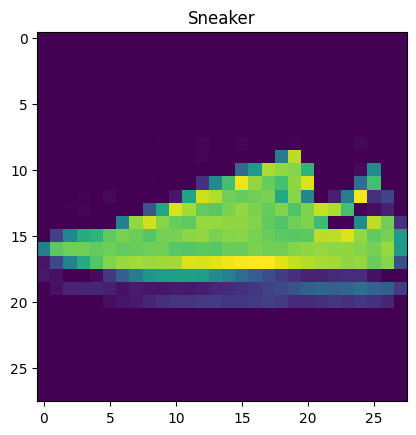

In [83]:
image,label=train_data[6]
plt.imshow(image.squeeze())
plt.title(class_names[label])

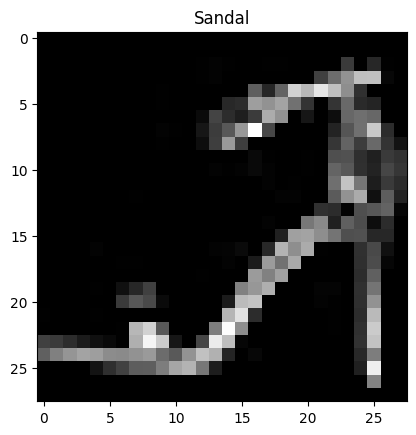

In [84]:
from pickle import FALSE
image,label=train_data[8]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label]);

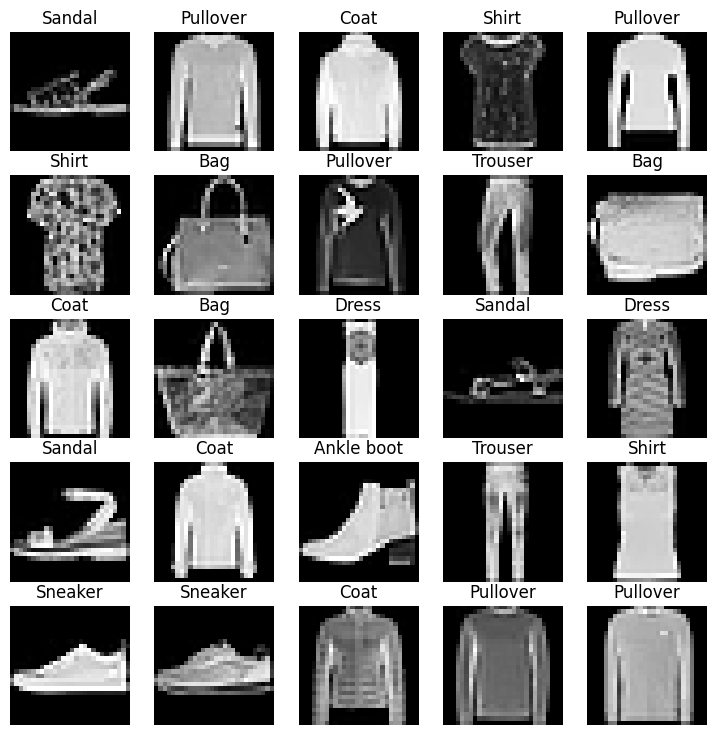

In [85]:
#plot more images
torch.manual_seed(55)
fig=plt.figure(figsize=(9,9))
rows,cols=5,5
for i in range(1,rows*cols+1):
  random_idx=torch.randint(1,len(train_data),size=[1]).item()
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.gca().set_axis_off()

## Prepare dataloader
we have data in form of pytorch dataset, now we convert into an iterable dataset.

It helps load data into a model.

For training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.
- With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

In [86]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [87]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [88]:
#check out whats inside train_dataloader
train_features,train_labels=next(iter(train_dataloader))
train_features.shape,train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [89]:
train_features[0].shape,train_features.shape

(torch.Size([1, 28, 28]), torch.Size([32, 1, 28, 28]))

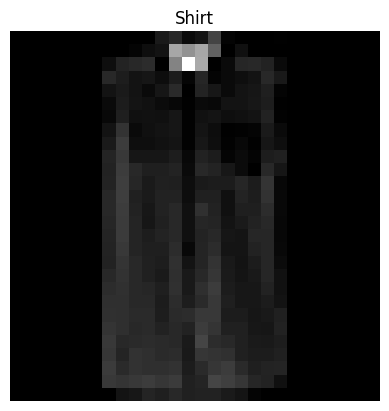

In [90]:
  random_idx=torch.randint(1,len(train_features),size=[1]).item()
  image,label=train_features[random_idx],train_labels[random_idx]
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.gca().set_axis_off()

## Model 0 : build our baseline model
baseline model is a simple model on which we will train and add more complexity

In [91]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [92]:
# Create a flatten layer
flatten_model=nn.Flatten()

#get a single sample
x=train_features[0]

#flatten the sample
y=flatten_model(x)

#print results
print(f'shape before flattening : {x.shape}')
print(f'shape after flattening : {y.shape}')

shape before flattening : torch.Size([1, 28, 28])
shape after flattening : torch.Size([1, 784])


In [93]:
class fashionV0(nn.Module):
  def __init__(self,input,hidden_units,output):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [94]:
torch.manual_seed(55)
model_0=fashionV0(input=784,hidden_units=10,output=len(class_names)).to(device)
model_0

fashionV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [95]:
dummy_x=torch.rand([1,1,28,28]).to(device)
model_0(dummy_x)

tensor([[ 0.4474, -0.1656,  0.6169, -0.1207,  0.2589,  0.0096,  0.1655, -0.3838,
          0.0572, -0.5996]], grad_fn=<AddmmBackward0>)

### Set up optimiser, loss function and evaluation metrics

- loss function - `nn.CrossEntropyLoss`
- optimiser - `torch.optim.SGD`
- evaluation - accuracy metrics



In [96]:
import requests
from  pathlib import Path

if Path('helper_fn.py').is_file():
  print('helper function already exists')
else:
  print('downloading')
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open ('helper_fn.py','wb') as f:
    f.write(request.content)

helper function already exists


In [97]:
#import accuracy function
from helper_fn import accuracy_fn

#setup loss function and optimiser
lossfn=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### Creating a function to time our experiments

let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the `timeit.default_timer()` function from the Python timeit module.

In [98]:
from timeit import default_timer as timer

def print_train_time(start,end,device=None):
  total_time=end-start
  print(f'training time on {device} -> {total_time:.3f}seconds')
  return total_time

In [99]:
start_time=timer()
## some code
end_time=timer()
print_train_time(start=start_time,end=end_time)

training time on None -> 0.000seconds


6.780500007153023e-05

### Create a training loop and testing loop on batches of data

Let's step through it:

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening.
5. Time it all (for fun).

In [100]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(55)
train_time_start=timer()

#set the number of epochs
epochs=3

#create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'\n\n Epoch:{epoch}\n----')


  ### Training
  train_loss=0
  train_acc=0
  # add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    model_0.train()
    y_preds=model_0(X) #forward pas00s
    loss=lossfn(y_preds,y) #calculate loss and accumulate loss every batch
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_preds.argmax(dim=1))
    optimiser.zero_grad() #optimise zero grad
    loss.backward() #back propogation
    optimiser.step() #parameters are updated every batch not after training on complete data

    if batch%400 ==0:
      print(f'looked at {batch*len(X)}/{len(train_dataloader.dataset)}  samples')
  #divide total train loss by length of traindataloader
  train_loss /= len(train_dataloader)
  # calculate test accuracy average per dataloader
  train_acc /= len(train_dataloader)


  ### Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      test_preds=model_0(X_test)
      test_loss += lossfn(test_preds,y_test) #calculate loss
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_preds.argmax(dim=1))
    # calculate test loss average per dataloader
    test_loss /= len(test_dataloader)
    # calculate test accuracy average per dataloader
    test_acc /= len(test_dataloader)


  # print whats happening
  print(f'train loss : {train_loss:.3f} | train accuracy : {train_acc:.3f}| test loss: {test_loss:.3f}| test accuracy : {test_acc:.3f}')


# calculate time
train_time_end=timer()
model_0_train_time=print_train_time(start=train_time_start,end=train_time_end,device=device)
model_0_train_time

  0%|          | 0/3 [00:00<?, ?it/s]



 Epoch:0
----
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.593 | train accuracy : 79.245| test loss: 0.509| test accuracy : 81.709


 Epoch:1
----
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.477 | train accuracy : 83.265| test loss: 0.601| test accuracy : 77.087


 Epoch:2
----
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.455 | train accuracy : 84.063| test loss: 0.470| test accuracy : 83.307
training time on cpu -> 34.884seconds


34.883978998999964

### Make predictions and get model_0 results

In [101]:
torch.manual_seed(55)

def eval_model(model,dataloader,lossfn,accuracyfn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(dataloader):
      X,y=X.to(device),y.to(device)
      ypreds=model(X)
      loss += lossfn(ypreds,y)
      acc += accuracyfn(y,ypreds.argmax(dim=1))

    # scale acc and loss to find average per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model name":model.__class__.__name__,"model loss":loss.item(),"model accuracy":acc}

In [102]:
# evaluate model_0
model_0_results=eval_model(model_0,test_dataloader,lossfn,accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'fashionV0',
 'model loss': 0.4698057472705841,
 'model accuracy': 83.30670926517571}

## Model_1: build a model with non linearity

In [103]:
class fashionV1(nn.Module):
  def __init__(self,input,hidden_units,output):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), #flatten inputs into a single vector
        nn.Linear(in_features=input,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)

In [104]:
torch.manual_seed(55)
model_1=fashionV1(input=784,hidden_units=10,output=len(class_names)).to(device)

### Set up loss function , accuracy function and optimiser

In [105]:
from helper_fn import accuracy_fn
lossfn=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(params = model_1.parameters() ,lr=0.1)

###  Functionising training and testing loop

- training loop - `train_step()`
- testing loop - `test_step()`


In [106]:
def train_step(model,dataloader,lossfn,optimiser,accuracy_fn):
  train_loss,train_acc=0,0
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    optimiser.zero_grad()
    ypreds=model(X)
    loss = lossfn(ypreds,y)
    train_loss = train_loss+ loss
    train_acc = train_acc+ accuracy_fn(y,ypreds.argmax(dim=1))
    loss.backward()
    optimiser.step()
    if batch%400 ==0:
      print(f'looked at {batch*len(X)}/{len(train_dataloader.dataset)}  samples')

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f'train loss : {train_loss}| train accuracy : {train_acc}')

In [107]:
def test_step(model,dataloader,lossfn,accuracy_fn):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      testpreds=model(X)
      test_loss = test_loss+ lossfn(testpreds,y)
      test_acc = test_acc +accuracy_fn(y,testpreds.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  print(f'test loss : {test_loss}|test accuracy :{test_acc}')

In [108]:
torch.manual_seed(55)

from timeit import default_timer as timer
start_time = timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f'\n Epoch:{epoch} \n---------')
  train_step(model_1,train_dataloader,lossfn,optimiser,accuracy_fn)
  test_step(model_1,test_dataloader,lossfn,accuracy_fn)

end_time=timer()

total_time=print_train_time(start_time,end_time)
total_time

  0%|          | 0/3 [00:00<?, ?it/s]


 Epoch:0 
---------
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 1.225436806678772| train accuracy : 54.22666666666667
test loss : 1.1133805513381958|test accuracy :56.938897763578275

 Epoch:1 
---------
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.9372246861457825| train accuracy : 64.415
test loss : 0.9604501128196716|test accuracy :61.84105431309904

 Epoch:2 
---------
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.864142656326294| train accuracy : 66.55166666666666
test loss : 0.8924155235290527|test accuracy :65.57507987220447
training time on None -> 35.224seconds


35.224043467

In [109]:
model_1_results=eval_model(model_1,test_dataloader,lossfn,accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'fashionV1',
 'model loss': 0.8924155235290527,
 'model accuracy': 65.57507987220447}

## Model2 : build a convolutional neural network  [CNN]
- CNNs are also called ConvNets
- CNNs are known for their capabilities to find patterns in visual data

https://poloclub.github.io/cnn-explainer/

In [110]:
class fashionV2(nn.Module):
  def __init__(self,input,hidden_units,output):
    super().__init__()

    #block one
    self.convblock_1=nn.Sequential(
        nn.Conv2d(in_channels=input,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    #block two
    self.convblock_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    #output/classifier layer
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output) #because flattened input to linear classifier layer is 1*10*7*7=490 but hidden units = 10 there we multiply 7*7 to make in_features of size 490
    )

  def forward(self,x):
    x=self.convblock_1(x)
    #print(x.shape)
    x=self.convblock_2(x)
    #print(x.shape)
    x=self.classifier(x)
   #print(x.shape)
    return x

In [111]:
torch.manual_seed(55)
model_2=fashionV2(1,10,len(class_names)).to(device)
model_2

fashionV2(
  (convblock_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [112]:
img=torch.randn(size=[1,1,28,28]).to(device)
result=model_2(img)
result

tensor([[ 0.0571,  0.0374, -0.0465, -0.0321, -0.0610,  0.0411,  0.0362, -0.0398,
         -0.0197, -0.0064]], grad_fn=<AddmmBackward0>)

### Stepping through `nn.Conv2d()`

In [113]:
torch.manual_seed(55)
## create a batch of images
images=torch.randn(size=[32,3,64,64])
test_image=images[0]

print(f'image batch shape : {images.shape}')
print(f'single image shape: {test_image.shape}')

image batch shape : torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])


In [114]:
# create a single conv2d layer
convlayer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1, padding=0)

convoutput=convlayer(test_image.unsqueeze(0))
test_image.shape,convoutput.shape

(torch.Size([3, 64, 64]), torch.Size([1, 10, 62, 62]))

### Stepping through `nn.MaxPool2d()`

In [115]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = convlayer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


### setting up loss function and optimiser

In [116]:
from helper_fn import accuracy_fn
lossfn=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### Train and test the model

In [117]:
torch.manual_seed(55)
epochs=3
from timeit import default_timer as timer
start=timer()
for epoch in tqdm(range(epochs)):
  train_step(model_2,train_dataloader,lossfn,optimiser,accuracy_fn)
  test_step(model_2,test_dataloader,lossfn,accuracy_fn)

end=timer()
model_2_training_time=print_train_time(start,end)
model_2_training_time

  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.6368565559387207| train accuracy : 77.00333333333333
test loss : 0.39404797554016113|test accuracy :85.72284345047923
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.35697948932647705| train accuracy : 86.965
test loss : 0.3985869288444519|test accuracy :85.09384984025559
looked at 0/60000  samples
looked at 12800/60000  samples
looked at 25600/60000  samples
looked at 38400/60000  samples
looked at 51200/60000  samples
train loss : 0.3219427466392517| train accuracy : 88.35166666666667
test loss : 0.33215808868408203|test accuracy :88.08905750798722
training time on None -> 174.755seconds


174.755252035

In [118]:
model_2_results=eval_model(model_2,test_dataloader,lossfn,accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'fashionV2',
 'model loss': 0.33215808868408203,
 'model accuracy': 88.08905750798722}

## Compare results

In [119]:
import pandas as pd
comparison=pd.DataFrame([model_0_results,model_1_results,model_2_results])
comparison

,model name,model loss,model accuracy
0,fashionV0,0.469806,83.306709
1,fashionV1,0.892416,65.575080
2,fashionV2,0.332158,88.089058


In [120]:
comparison["training time"]=[model_0_train_time,total_time,model_2_training_time]
comparison

,model name,model loss,model accuracy,training time
0,fashionV0,0.469806,83.306709,34.883979
1,fashionV1,0.892416,65.575080,35.224043
2,fashionV2,0.332158,88.089058,174.755252


Text(0, 0.5, 'model')

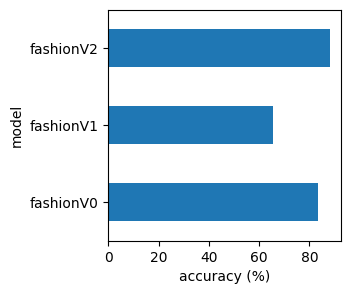

In [121]:
# Visualise our model
plt.figure(figsize=(3,3))
comparison.set_index("model name")["model accuracy"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions with model_2


In [122]:
def make_prediction(model,data,device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      ## prepare the sample
      sample=torch.unsqueeze(sample,dim=0).to(device)
      ## forward pass to get raw logits
      pred_logits=model(sample)
      ## convert logits into prediction probability
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())

  ##stack the list into a tensor
  return torch.stack(pred_probs)

In [123]:
import random
random.seed(55)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [124]:
# make prediction
pred_prob=make_prediction(model_2,test_samples,device)

#convert into labels
pred_labels=torch.argmax(pred_prob,dim=1)
pred_labels

tensor([5, 5, 7, 9, 0, 9, 3, 0, 1])

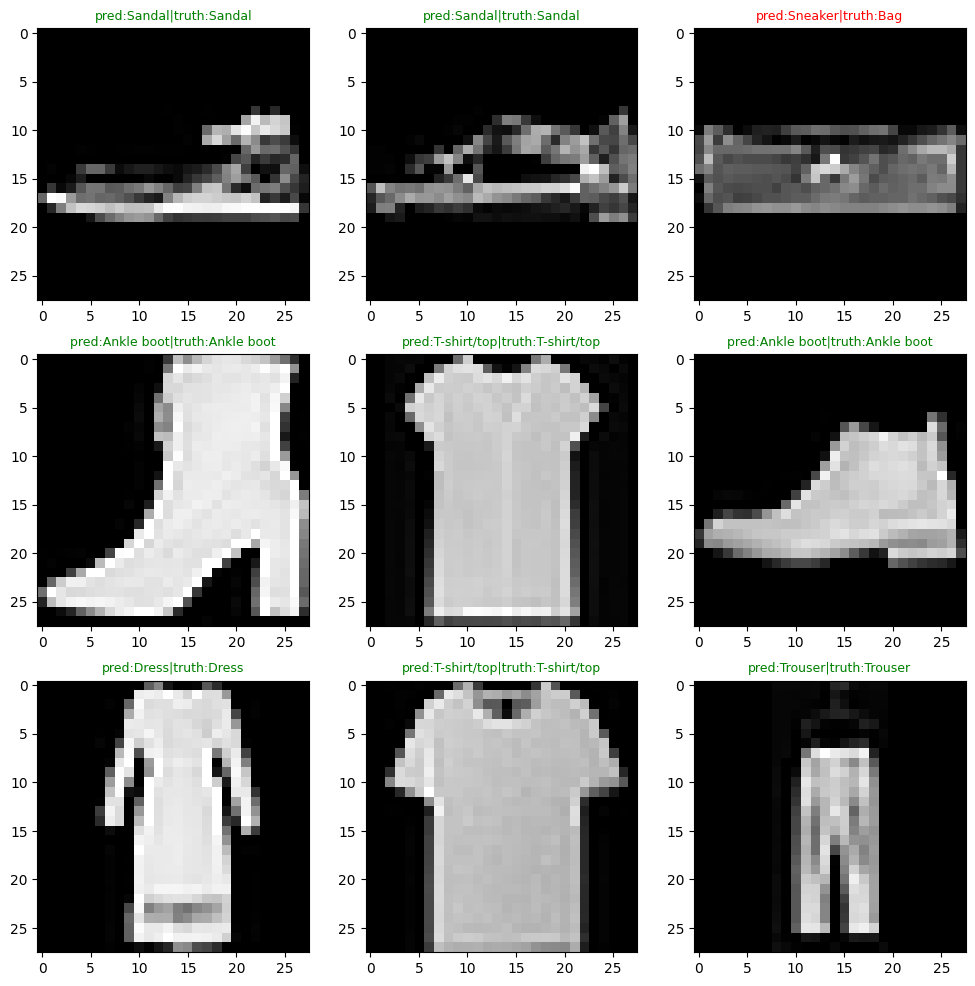

In [125]:
#Plot predictions

plt.figure(figsize=(12,12))
rows,cols=3,3

for i,sample in enumerate(test_samples):
  plt.subplot(rows,cols,i+1) #add one subplot for each prediction
  plt.imshow(sample.squeeze(),cmap='gray') #plot samples

  ## compare labels
  pred_label=class_names[pred_labels[i]]
  true_label=class_names[test_labels[i]]

  text=f"pred:{pred_label}|truth:{true_label}"
  if pred_label==true_label:
    plt.title(text,fontsize=9,c='g')
  else:
    plt.title(text,fontsize=9,c='r')

## Making confusion matrix for further evaluation

- make predictions wiht our model on the test data
- make a confusion matrix `torchmetrics.ConfusionMatrix`
- plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [126]:
from tqdm.auto import tqdm

# Make predictions
y_preds=[]

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making predictions..."):
    X,y=X.to(device),y.to(device)
    y_logits=model_2(X)
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    # put predictions on cpu of evaluation
    y_preds.append(y_pred.cpu())


  # concatenate the list of predictions into a single tensor
  y_pred_tensor=torch.cat(y_preds)
  print(y_pred_tensor[:10])

making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])


In [127]:
try:
  import torchmetrics,mlxtend
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend

In [128]:
mlxtend.__version__

'0.23.1'

In [129]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [130]:
confmat=ConfusionMatrix(num_classes=len(class_names),task="multiclass")
matrix=confmat(preds=y_pred_tensor,target=test_data.targets)
matrix

tensor([[698,   6,  16,  88,   5,   0, 178,   0,   9,   0],
        [  5, 838,   0, 135,  12,   0,   7,   0,   2,   1],
        [ 17,   6, 750,  25, 104,   0,  91,   0,   7,   0],
        [ 26,  12,   8, 901,  24,   0,  25,   0,   4,   0],
        [  9,   8, 105,  66, 703,   0, 103,   0,   6,   0],
        [ 15,   4,   1,  31,   0, 745,  17,  74,  92,  21],
        [105,   5,  84,  93,  97,   0, 602,   0,  14,   0],
        [  1,   1,   0,   0,   0,  23,   0, 929,   9,  37],
        [ 10,   3,   6,  14,   4,   8,  18,   7, 928,   2],
        [  0,   0,   0,   6,   0,  32,   2, 113,  25, 822]])

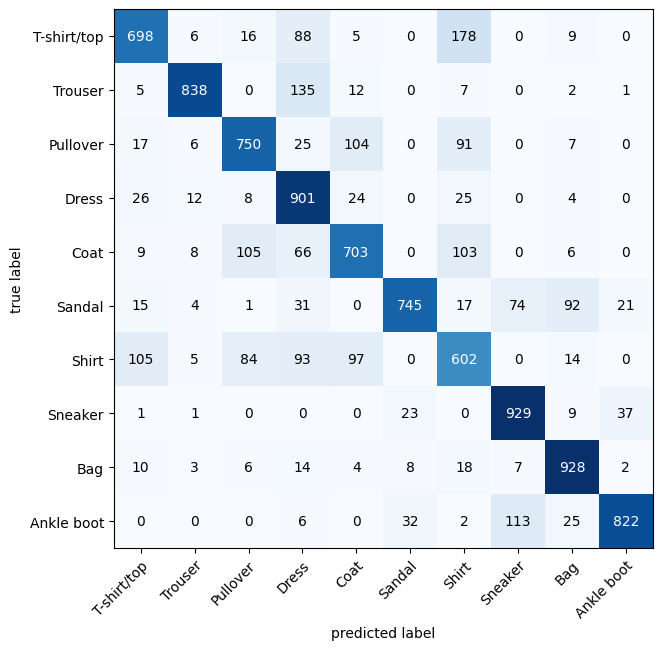

In [131]:
fig , ax = plot_confusion_matrix(conf_mat=matrix.numpy(),class_names=class_names,figsize=(10,7))

## Saving and loading our best model

In [132]:
from pathlib import Path

model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="CNN_model.pth"
model_save_path=model_path/model_name

torch.save(obj=model_2.state_dict(),f=model_save_path)

In [133]:
## load model

# Create instance
torch.manual_seed(55)
loaded_model_2=fashionV2(input=1,hidden_units=10,output=len(class_names))

# load save dict
loaded_model_2.load_state_dict(torch.load(f=model_save_path))
loaded_model_2.to(device)

<ipython-input-133-a8eed48695a5>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=model_save_path))


fashionV2(
  (convblock_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [134]:
loaded_model_2_results=eval_model(loaded_model_2,test_dataloader,lossfn,accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [135]:
## evaluate
torch.isclose(torch.tensor(model_2_results["model loss"]),torch.tensor(loaded_model_2_results["model loss"]),atol=0.002)

tensor(True)